In [1]:
import sys,os
modp = os.path.dirname(os.path.dirname(os.path.abspath("")))
import pandas as pd
if modp not in sys.path:
    sys.path.insert(0,modp)
    sys.path.append(modp)

from tools.ecdf._generate_ecdf_helper import test_mol, \
    _single_call_parallel_featurize_molfiles, get_molecule_featurizer, attach_output_dir_molecule_featurizer, \
    write_info, _single_call_check_distributionfiles

INFO:rdkit:Enabling RDKit 2021.09.2 jupyter extensions


(array([1.000000e+00, 1.000000e+00, 3.000000e+00, 6.700000e+01,
        2.064861e+06, 1.675700e+04, 2.777000e+03, 1.390000e+02,
        9.700000e+01, 2.000000e+00, 9.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([-4.  , -3.08, -2.16, -1.24, -0.32,  0.6 ,  1.52,  2.44,  3.36,
         4.28,  5.2 ,  6.12,  7.04,  7.96,  8.88,  9.8 , 10.72, 11.64,
        12.56, 13.48, 14.4 , 15.32, 16.24, 17.16, 18

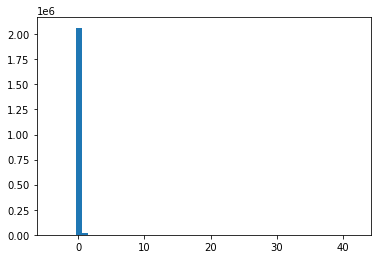

In [26]:
loader = ecdf_conf.MOL_DATALOADER(ecdf_conf.MOL_DIR)
molfeats = get_molecule_featurizer()
#print(molfeats)

In [5]:
def load_normalizations():
    #try to read local file and bu
    norm_file = os.path.join(molNet.get_user_folder(),"parameter","normdata.csv")
    norm_df=None
    
    try:
        norm_df=pd.read_csv(norm_file)
    except Exception:
        pass
    
    try:
        norm_df=pd.read_csv(norm_file+"_bu")
    except Exception:
        pass
    
    
    norm_file = os.path.join(os.path.abspath(os.path.dirname(molNet.featurizer.__file__)),"normdata.csv")
    
    try:
        norm_df=pd.read_csv(norm_file)
    except Exception:
        pass
    
    try:
        norm_df=pd.read_csv(norm_file+"_bu")
    except Exception:
        pass
    
    
    # last resort set empty (should never happen in production)
    if norm_df is None:
        norm_df=pd.DataFrame()
            
            
    return norm_df
NORM_DATA = load_normalizations()
NORM_DATA

""


In [10]:
def get_norm_data(featurizer):
    try:
        return NORM_DATA.loc[featurizer]
    except:
        return {}
get_norm_data(mol_feat.index[0])

{}

In [1]:
import os

In [1]:
import sys
import inspect
from inspect import isfunction, getsource

import pandas as pd
from numba.core.registry import CPUDispatcher
from scipy._lib._util import getfullargspec_no_self as _getfullargspec

modp = os.path.dirname(os.path.dirname(os.path.abspath("")))
if modp not in sys.path:
    sys.path.insert(0,modp)
    sys.path.append(modp)
import ecdf_conf

from molNet.featurizer import molecule_featurizer, normalization

,length,molfeat,atomfeat,dtype,class,module
molNet.featurizer._manual_molecule_featurizer.molecule_num_fragments,1,True,False,<class 'numpy.int32'>,<class 'molNet.featurizer._manual_molecule_fea...,molNet.featurizer._manual_molecule_featurizer
molNet.featurizer._molecule_featurizer.molecule_functional_group_12_Diamines_featurizer,1,True,False,<class 'bool'>,<class 'molNet.featurizer._molecule_featurizer...,molNet.featurizer._molecule_featurizer
molNet.featurizer._molecule_featurizer.molecule_functional_group_1H_Azirines_Hs_featurizer,1,True,False,<class 'bool'>,<class 'molNet.featurizer._molecule_featurizer...,molNet.featurizer._molecule_featurizer
molNet.featurizer._molecule_featurizer.molecule_functional_group_1H_Diazirenes_Hs_featurizer,1,True,False,<class 'bool'>,<class 'molNet.featurizer._molecule_featurizer...,molNet.featurizer._molecule_featurizer
molNet.featurizer._molecule_featurizer.molecule_functional_group_1H_Triazirene_Hs_featurizer,1,True,False,<class 'bool'>,<class 'molNet.featurizer._molecule_featurizer...,molNet.featurizer._molecule_featurizer
...,...,...,...,...,...,...
molNet.featurizer._autogen_rdkit_feats_rdkit_vec_molecule_featurizer.molecule_LayeredFingerprint,2048,True,False,<class 'bool'>,<class 'molNet.featurizer._autogen_rdkit_feats...,molNet.featurizer._autogen_rdkit_feats_rdkit_v...
molNet.featurizer._autogen_rdkit_feats_rdkit_vec_molecule_featurizer.molecule_MACCSKeysFingerprint,167,True,False,<class 'bool'>,<class 'molNet.featurizer._autogen_rdkit_feats...,molNet.featurizer._autogen_rdkit_feats_rdkit_v...
molNet.featurizer._autogen_rdkit_feats_rdkit_vec_molecule_featurizer.molecule_PatternFingerprint,2048,True,False,<class 'bool'>,<class 'molNet.featurizer._autogen_rdkit_feats...,molNet.featurizer._autogen_rdkit_feats_rdkit_v...
molNet.featurizer._autogen_rdkit_feats_rdkit_vec_molecule_featurizer.molecule_RDKFingerprint,2048,True,False,<class 'bool'>,<class 'molNet.featurizer._autogen_rdkit_feats...,molNet.featurizer._autogen_rdkit_feats_rdkit_v...


In [13]:
norm_functions={}
for f in dir(normalization):
    func = getattr(normalization,f)
    #print(f,func,func.__class__)
    if (isfunction(func) or isinstance(func,CPUDispatcher)) and "norm" in func.__name__:
        norm_functions[func.__name__]=func
        print(getsource(func))

@jit(nopython=True)
def dual_sig_norm(x, m: float = 0, d1: float = 1, d2: float = 1):
    dt=max(d1/d2,d2/d1)*10
    s1=sig_norm(x, m, d1)
    s2=sig_norm(x, m, d2)
    st=sig_norm(x, m, dt)
    return s1*(1-st)+s2*st

@jit(nopython=True)
def genlog_norm(x, B: float = 1, M: float = 0, Q: float = 1, v: float = 0.1):
    # B=growth rate (-np.inf,np.inf)
    # M=shifts horizontally (-np.inf,np.inf)
    # Q=urvibess/stepness (0,np.inf)
    # v=stepness (1e-12,np.inf)
    return 1 / (1 + Q * np.exp(-B * (x - M))) ** (1 / v)

@jit(nopython=True)
def linear_norm(x, m: float = 1, c: float = 0):
    return x * m + c

@jit(nopython=True)
def min_max_norm(x, min: float = 0, max: float = 1):
    # if min>max:
    #    max,min=min,max
    # if min == max:
    #    max*= 1+1e-6
    ll:double = 0.0
    ul:double = 1.0
    return jitclip(linear_norm(x, m=1 / (max - min), c=-min / (max - min)),ll,ul)

@jit(nopython=True)
def sig_norm(x, m: float = 0, d: float = 1):
    return 1 / (1 + np.exp(-d * (x - 

In [62]:
mux_dataset=[]
mux_normalization=[]
mux_parameter=[]

for ds in ["initially"]:
    for name, normf in norm_functions.items():
        sig = _getfullargspec(normf)
        for arg in sig.args[1:]:
            mux_dataset.append(ds)
            mux_normalization.append(name)
            mux_parameter.append(arg)
        mux_dataset.append(ds)
        mux_normalization.append(name)
        mux_parameter.append("R2")
    
    mux_dataset.append(ds)
    mux_normalization.append("best")
    mux_parameter.append("method")

mux =  pd.MultiIndex.from_arrays([mux_dataset,mux_normalization,mux_parameter], names=('dataset', 'normalization','parameter'))
norm_df = pd.DataFrame(columns=mux)
norm_df

Empty DataFrame
Columns: [(initially, dual_sig_norm, m), (initially, dual_sig_norm, d1), (initially, dual_sig_norm, d2), (initially, dual_sig_norm, R2), (initially, genlog_norm, B), (initially, genlog_norm, M), (initially, genlog_norm, Q), (initially, genlog_norm, v), (initially, genlog_norm, R2), (initially, linear_norm, m), (initially, linear_norm, c), (initially, linear_norm, R2), (initially, min_max_norm, min), (initially, min_max_norm, max), (initially, min_max_norm, R2), (initially, sig_norm, m), (initially, sig_norm, d), (initially, sig_norm, R2), (initially, tanh_norm, m), (initially, tanh_norm, d), (initially, tanh_norm, R2), (initially, best, method)]
Index: []

[0 rows x 22 columns]

In [64]:
norm_df[("initially","best","method")]="unity"
for r,d in infos.iterrows():
    if r not in norm_df.index:
        norm_df.loc[r]=None
    
    
    
    #fill initially.
    if d["dtype"]==bool:
        norm_df.loc[r,("initially","min_max_norm","min")]=0
        norm_df.loc[r,("initially","min_max_norm","max")]=1
        norm_df.loc[r,("initially","min_max_norm","R2")]=1.0
        
        norm_df.loc[r,("initially","linear_norm","m")]=1
        norm_df.loc[r,("initially","linear_norm","c")]=0
        norm_df.loc[r,("initially","linear_norm","R2")]=1.0
        
        norm_df.loc[r,("initially","tanh_norm","d")]=100
        norm_df.loc[r,("initially","tanh_norm","m")]=0
        norm_df.loc[r,("initially","tanh_norm","R2")]=0.999
        
        norm_df.loc[r,("initially","sig_norm","d")]=100
        norm_df.loc[r,("initially","sig_norm","m")]=0.5
        norm_df.loc[r,("initially","sig_norm","R2")]=0.999
        
        norm_df.loc[r,("initially","dual_sig_norm","d1")]=100
        norm_df.loc[r,("initially","dual_sig_norm","d2")]=100
        norm_df.loc[r,("initially","dual_sig_norm","m")]=0.5
        norm_df.loc[r,("initially","dual_sig_norm","R2")]=0.999
norm_df

dataset                                                initially            \
normalization                                      dual_sig_norm             
parameter                                                      m   d1   d2   
molNet.featurizer._manual_molecule_featurizer.m...           NaN  NaN  NaN   
molNet.featurizer._molecule_featurizer.molecule...           0.5  100  100   
molNet.featurizer._molecule_featurizer.molecule...           0.5  100  100   
molNet.featurizer._molecule_featurizer.molecule...           0.5  100  100   
molNet.featurizer._molecule_featurizer.molecule...           0.5  100  100   
...                                                          ...  ...  ...   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...           0.5  100  100   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...           0.5  100  100   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...           0.5  100  100   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...           0.5  100  100   
molNet.featurizer.molecule_featurizer.molecule_...           NaN  NaN  NaN   

dataset                                                                     \
normalization                                             genlog_norm        
parameter                                              R2           B    M   
molNet.featurizer._manual_molecule_featurizer.m...    NaN         NaN  NaN   
molNet.featurizer._molecule_featurizer.molecule...  0.999         NaN  NaN   
molNet.featurizer._molecule_featurizer.molecule...  0.999         NaN  NaN   
molNet.featurizer._molecule_featurizer.molecule...  0.999         NaN  NaN   
molNet.featurizer._molecule_featurizer.molecule...  0.999         NaN  NaN   
...                                                   ...         ...  ...   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  0.999         NaN  NaN   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  0.999         NaN  NaN   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  0.999         NaN  NaN   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  0.999         NaN  NaN   
molNet.featurizer.molecule_featurizer.molecule_...    NaN         NaN  NaN   

dataset                                                                        \
normalization                                                     linear_norm   
parameter                                             Q    v   R2           m   
molNet.featurizer._manual_molecule_featurizer.m...  NaN  NaN  NaN         NaN   
molNet.featurizer._molecule_featurizer.molecule...  NaN  NaN  NaN           1   
molNet.featurizer._molecule_featurizer.molecule...  NaN  NaN  NaN           1   
molNet.featurizer._molecule_featurizer.molecule...  NaN  NaN  NaN           1   
molNet.featurizer._molecule_featurizer.molecule...  NaN  NaN  NaN           1   
...                                                 ...  ...  ...         ...   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  NaN  NaN  NaN           1   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  NaN  NaN  NaN           1   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  NaN  NaN  NaN           1   
molNet.featurizer._autogen_rdkit_feats_rdkit_ve...  NaN  NaN  NaN           1   
molNet.featurizer.molecule_featurizer.molecule_...  NaN  NaN  NaN         NaN   

dataset                                             ...                    \
normalization                                       ... min_max_norm        
parameter                                           ...          min  max   
molNet.featurizer._manual_molecule_featurizer.m...  ...          NaN  NaN   
molNet.featurizer._molecule_featurizer.molecule...  ...            0    1   
molNet.featurizer._molecule_featurizer.molecule...  ...            0    1   
molNet.featurizer._molecule_featurizer.molecule...  ...            0    1   
molNet.featurizer._molecule_featurizer.molecule...  ...            0    1   
...                                                 ...        